In [2]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import glob, os

from matplotlib.pyplot import figure
from collections import Counter
from sklearn.cluster import KMeans

from scipy.signal import find_peaks

from PIL import Image, ImageOps, ImageChops



In [5]:
def hue_extraction(hue,largo):
  f_hue = np.zeros(largo)

  # hue_l = hue * largo
  altura, ancho = hue.shape
  for i in range(altura):
    for j in range(ancho):
        indice = int(np.rint( (hue[i][j] * largo) / 360 )) 

        f_hue[indice % largo] += 1
        #f_hue[(indice - 1) % largo] += 0.5
        #f_hue[(indice + 1) % largo] += 0.5

  # elimiar el blanco del vector
  f_hue[0] = 0
  f_hue /= np.max(f_hue)
  return f_hue


In [3]:

pidinet =  Image.open("bimodal_byol_shoes_utils/Shoes/images_train_pidinet/shoes/1031000079.png", mode='r')
#pidinet =  Image.open("bimodal_byol_shoes_utils/Shoes/images_train_pidinet/shoes/1031000079.png", mode='r')

pidinet.size

(400, 400)

In [4]:

files = list(glob.glob("bimodal_byol_shoes_utils/Shoes/images_train/shoes/*.png"))

i = 900
groups = -1
str_name = ""
for path in files[900:-1]:
    
    try:

        im1 = Image.open(path, mode='r')
        im1_hsv = im1.convert('HSV')

        im1_data = np.array(im1_hsv)[:,:,0]


        rel = hue_extraction(im1_data, 360)

        peak_idx, _ = find_peaks(rel, height=0.08)

        im = np.array(im1)

        (h,w,c) = im.shape
        im12D = im.reshape(h*w,c)


        groups =  len(peak_idx) if len(peak_idx) < 6 else 6
        groups = groups if groups > 3 else 3

        kmeans_model = KMeans(n_clusters = groups) # we shall retain only 7 colors
        cluster_labels = kmeans_model.fit_predict(im12D)


        rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)


        img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))

        img_quant = img_quant.astype(np.uint8)
        randomImage = Image.fromarray(img_quant)

        str_name = path.split("/")[-1].split(".")[0]
        randomImage.save("bimodal_byol_shoes_utils/Shoes/images_train_clusterize/shoes/" + str_name + ".png")


        if i % 100 == 0:
            print(i, " imágenes procesadas")

        i = i + 1
    
    except Exception as e:
        print(path)
        print(groups)
        print(e)
        
        


900  imágenes procesadas
1000  imágenes procesadas
1100  imágenes procesadas
1200  imágenes procesadas
1300  imágenes procesadas
1400  imágenes procesadas
1500  imágenes procesadas
1600  imágenes procesadas
1700  imágenes procesadas


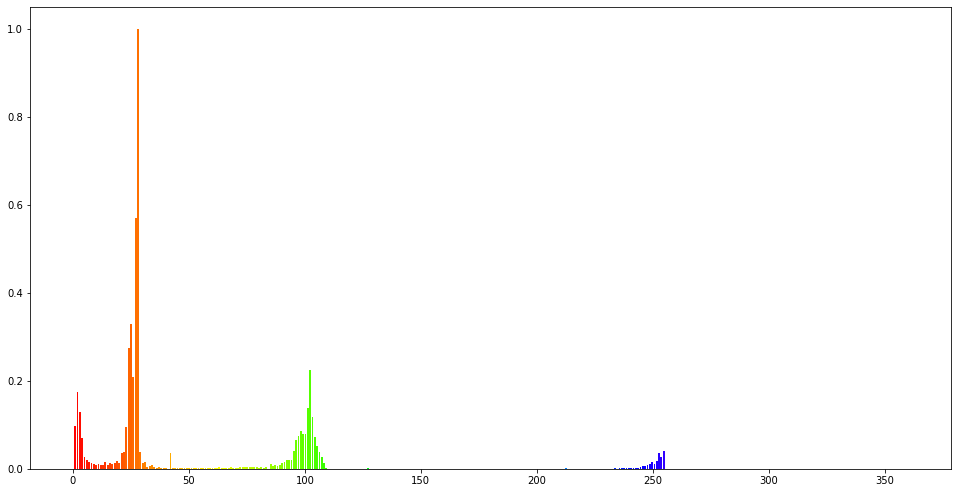

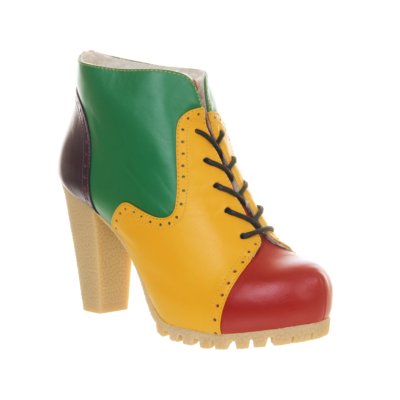

In [10]:
im1 = Image.open("bimodal_byol_shoes_utils/Shoes/images_train/shoes/1452790185.png", mode='r')
im1_hsv = im1.convert('HSV')

im1_data = np.array(im1_hsv)[:,:,0]


rel = hue_extraction(im1_data, 360)


a = np.linspace(0,360, num = 360)

fig, ax = plt.subplots()

my_cmap = plt.get_cmap("hsv")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

ax.bar(a, rel, color=my_cmap(rescale(a)) )

fig.set_size_inches(16.5, 8.5)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))


plt.show()
display(im1)

RGB
L


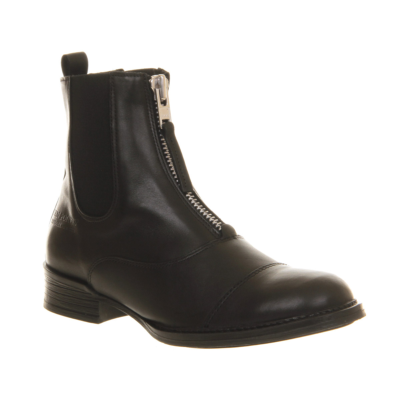

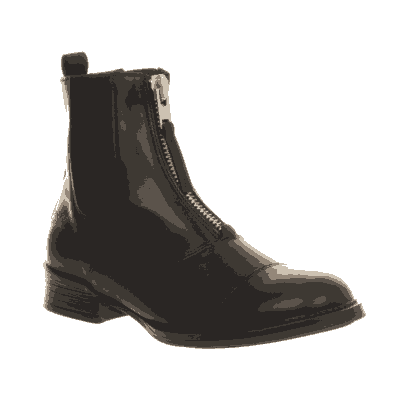

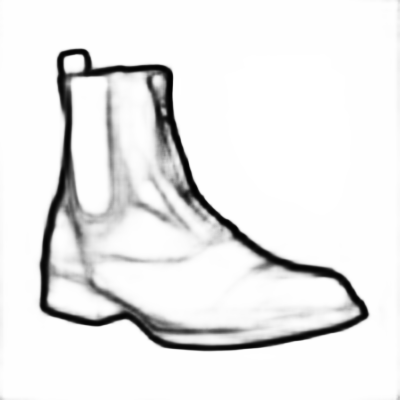

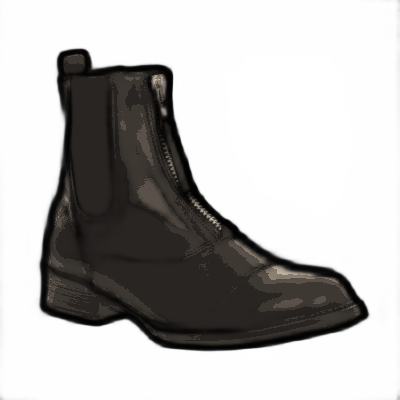

In [3]:
original =  Image.open("bimodal_byol_shoes_utils/Shoes/images_train/shoes/1450045775.png", mode='r')
clusterize =  Image.open("bimodal_byol_shoes_utils/Shoes/images_train_clusterize/shoes/1450045775.png", mode='r')
pidinet =  Image.open("bimodal_byol_shoes_utils/Shoes/images_train_pidinet/shoes/1450045775.png", mode='r')

print(clusterize.mode)
print(pidinet.mode)

im3 = ImageChops.multiply(clusterize, pidinet.convert('RGB'))
# clusterize.paste(pidinet, box=(0,0))
#im3 = Image.composite(clusterize, clusterize,pidinet)
display(original)
display(clusterize)
display(pidinet)
display(im3)


In [38]:
clusterize =  list(glob.glob("bimodal_byol_shoes_utils/Shoes/images_train_clusterize/shoes/*.png"))
pidinet =  list(glob.glob("bimodal_byol_shoes_utils/Shoes/images_train_pidinet/shoes/*.png"))


i = 0

for i in range(len(clusterize)):
    
    color = Image.open(clusterize[i])
    grafito = Image.open(pidinet[i])
    
    name_clusterize = clusterize[i].split("/")[-1].split(".")[0]
    name_pidinet = pidinet[i].split("/")[-1].split(".")[0]
    
    
    if name_clusterize == name_pidinet:
        
        im3 = ImageChops.multiply(color, grafito.convert('RGB'))

        im3.save("bimodal_byol_shoes_utils/Shoes/images_train_pidinet_color/shoes/" + name_pidinet + ".png")
    else:
        print("names weren't the same!")
        print(name_clusterize, " ", name_pidinet, " at iteration: ", i)
        break
        
    if i % 100 == 0:
        print(i, " imágenes procesadas")
        

0  imágenes procesadas
100  imágenes procesadas
200  imágenes procesadas
300  imágenes procesadas
400  imágenes procesadas
500  imágenes procesadas
600  imágenes procesadas
700  imágenes procesadas
800  imágenes procesadas
900  imágenes procesadas
1000  imágenes procesadas
1100  imágenes procesadas
1200  imágenes procesadas
1300  imágenes procesadas
1400  imágenes procesadas
1500  imágenes procesadas
1600  imágenes procesadas
1700  imágenes procesadas


In [47]:
pidinet_color =  list(glob.glob("bimodal_byol_shoes_utils/Shoes/images_train_pidinet_color/shoes/*.png"))
shoes =  list(glob.glob("bimodal_byol_shoes_utils/Shoes/images_train/shoes/*.png"))

print(len(pidinet_color))
print(len(shoes))

1799
1799


In [59]:
test =  Image.open("bimodal_byol_shoes_utils/Shoes/50_test_color/shoes/2429245009_1.png", mode='r')

test_color =  list(glob.glob("bimodal_byol_shoes_utils/Shoes/50_test_color/shoes/*.png"))

i = 0

for i in range(len(test_color)):
    
    name = test_color[i].split("/")[-1].split(".")[0]
    
    img = Image.open(test_color[i], mode='r')
    img.load() # required for png.split()

    img3 = Image.new("RGB", img.size, (255, 255, 255))
    img3.paste(img, mask=img.split()[3]) # 3 is the alpha channel

    
    img3.save("bimodal_byol_shoes_utils/Shoes/50_test_color/shoes/" + name + ".png")


RGB


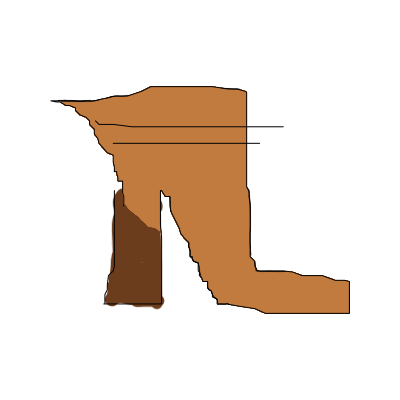

In [60]:

test = Image.open("bimodal_byol_shoes_utils/Shoes/50_test_color/shoes/2429245009_1.png", mode='r')

print(test.mode)
display(test)